### LinearRegression 클래스 - Ordinary Least Squares 

* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 주거의 방 개수 
* AGE : 건축된 소유 주택의 연식, 1940년 이전에 건축된 소유주택 
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 책정된 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유 주택 가격에서의 중앙값(Median)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
# boston data set 변환

boston_df =pd.DataFrame(boston.data, columns=boston.feature_names)

# boston_df의 y값을 생성한다. 
boston_df['PRICE'] = boston.target
print('boston data shape:', boston_df.shape)
boston_df.head()

boston data shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [11]:
len(lm_features)

9

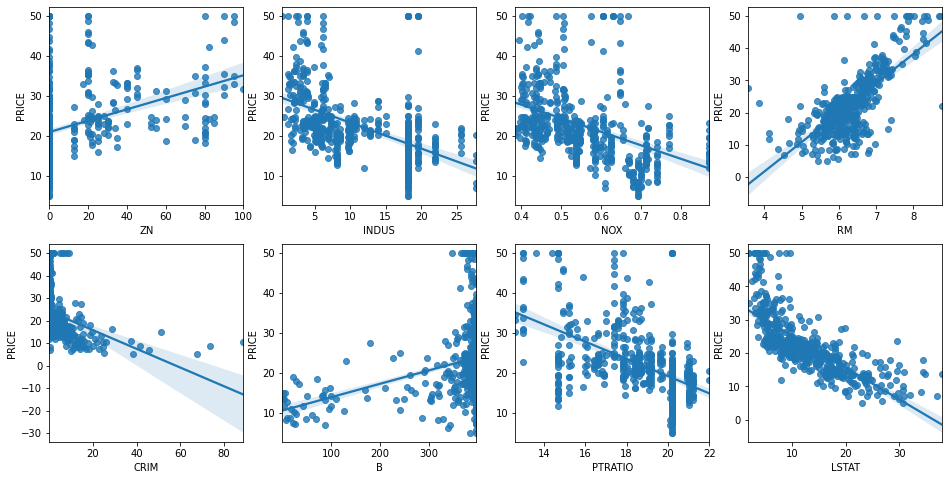

In [28]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['ZN', 'INDUS', 'NOX', 'RM', 'CRIM', 'B', 'PTRATIO', 'LSTAT']

# for i, ftr in enumerate(lm_features):
for i, ftr in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=ftr, y='PRICE', data=boston_df, ax=axs[row,col])

    
# # 위의 for문이 먹히지 않을때 
# # NGD(노가다)기법    

# fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

# sns.regplot(x='RM', y='PRICE', data=bostonDF, ax=axs[0][0])
# sns.regplot(x='ZN', y='PRICE', data=bostonDF,ax=axs[0,1])
# sns.regplot(x='INDUS', y='PRICE', data=bostonDF,ax=axs[0,2])
# sns.regplot(x='NOX', y='PRICE', data=bostonDF,ax=axs[0,3])
# sns.regplot(x='AGE', y='PRICE', data=bostonDF, ax=axs[1,0])
# sns.regplot(x='PTRATIO', y='PRICE', data=bostonDF, ax=axs[1,1])
# sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=axs[1,2])
# sns.regplot(x='RAD', y='PRICE', data=bostonDF, ax=axs[1,3])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.drop(['PRICE'], axis = 1, inplace=False)
y_target = boston_df['PRICE']

# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형회귀 모델로 fit/pred/eval

lr = LinearRegression()
lr.fit(X_train,y_train)

preds_lr = lr.predict(X_test)
mse = mean_squared_error(y_test,preds_lr)
rmse = np.sqrt(mse)

r2_1 = r2_score(y_test,preds_lr)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse, rmse))
print('R_squared:{0:.4f}'.format(r2_1))

MSE:17.2969, RMSE:4.1590
R_squared:0.7572


In [35]:
# intercept(절편)과 coefficient(계수)값 확인

print('절편 값:', lr.intercept_)
print('계수 값:',np.round(lr.coef_,2))

coef_1 = np.round(lr.coef_,2)

절편 값: 40.995595172164336
계수 값: [-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [38]:
# 회귀계수 정렬
coef_seri = pd.Series(data=coef_1, index=X_data.columns)
coef_seri.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보자. 사이킷런은 cross_val_score()를 이용하지만, RMSE를 제공하지 않으므로 MSE 수치결과를 RMSE로 반환해야 한다. cross_val_score()의 인자로 scoring = 'neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값이다. 

사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이다.

In [43]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)
linear_reg = LinearRegression()

# cross_val_score()로 5폴드 set
# MSE를 구한 뒤
# 이를 기반으로 RMSE

neg_mse_scores = cross_val_score(linear_reg, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# Negative MSE scores는 전부 다 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE scores:', np.round(avg_rmse,2))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


## 다항 회귀를 이용한 과소적합 및 과적합 이해 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
%matplotlib inline

In [101]:
# 임의의 값으로 구성된 X값에 대해
# 코사인 변환 값을 반환.

def true_func(X):
    return np.cos(1.5* np.pi * X)

# X는 0에서부터 1까지 30개의 임의의 값을
# 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples)) # 0에서부터 시작된 값을 sorting하여
                                       # X값에 할당 or 선언


# y값은 코사인 기반의 true_func 
# 약간의 노이즈 변동을 더했다

y = true_func(X)+ np.random.randn(n_samples) *0.1


Degree 1 회귀 계수는 [-2.] 입니다.

Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.

Degree 4 MSE는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.

Degree 15 MSE는 182815433.47648773 입니다.


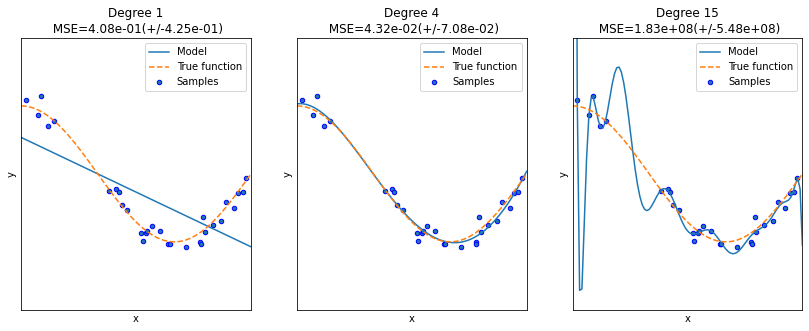

In [102]:
# 다항식 차수를 각각 1, 4, 15로 변경하며 결과비교하기
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가하기
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', 
                             cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('\nDegree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행 및 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title("Degree {}\n MSE={:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

y = -2 * X
y = a * x1 + -18*X^2 + 24*X^3 + -7*X^4

# 릿지 규제(L2규제) vs 라쏘 규제(L1규제)

pred_y = ax + b 

MSE :: np.mean((actual_y - pred_y)^2) + 어떠한 값을 더해줌... 


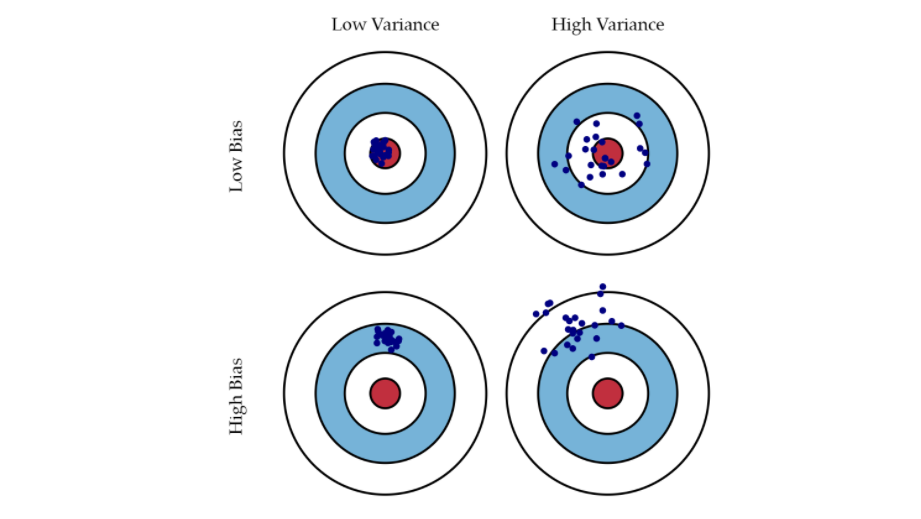

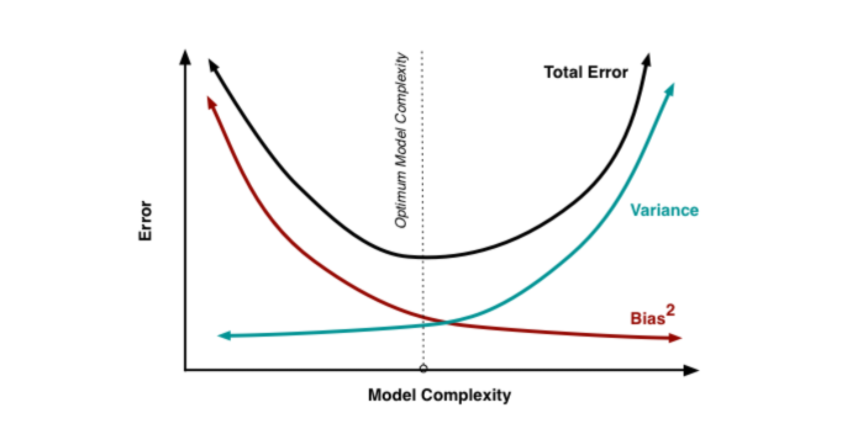 